In [3]:

!wget --quiet -O /home/rishabh/Downloads/train_data_keras.tar.gz https://cocl.us/DL0320EN_TRAIN_TAR_KERAS
!tar -xzf /home/rishabh/Downloads/train_data_keras.tar.gz -C /home/rishabh/Downloads --exclude '.*'

# Download Validation Dataset
!wget --quiet -O /home/rishabh/Downloads/validation_data_keras.tar.gz https://cocl.us/DL0320EN_VALID_TAR_KERAS
!tar -xzf /home/rishabh/Downloads/validation_data_keras.tar.gz -C /home/rishabh/Downloads --exclude '.*'

In [1]:
import keras

Using TensorFlow backend.
/home/rishabh/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
import os
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
import pandas as pd
from PIL import Image
import numpy as np 

In [4]:
import keras
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.models import Model

In [5]:
TARGET_SIZE = (224,224)
BATCH_SIZE = 5
CLASSES = ['5', '10', '20', '50', '100', '200', '500']
RANDOM_SEED = 0

In [6]:
train_data_dir = '/home/rishabh/Downloads/train_data_keras'

In [7]:
train_generator = ImageDataGenerator().flow_from_directory(train_data_dir
                                                           , target_size=(224, 224)
                                                           , batch_size=10
                                                           , classes=CLASSES
                                                           , seed=0
                                                           , shuffle=True)

Found 70 images belonging to 7 classes.


In [8]:
validation_data_dir = '/home/rishabh/Downloads/validation_data_keras'

In [9]:
valid_generator = ImageDataGenerator().flow_from_directory(validation_data_dir
                                                           , target_size=(224, 224)
                                                           , batch_size=5
                                                           , classes=CLASSES
                                                           , seed=0
                                                          , shuffle=True)

Found 70 images belonging to 7 classes.


In [5]:
base = ResNet50(weights='imagenet')

In [ ]:
for layer in base.layers:
    layer.trainable=False

In [12]:
sec_last_base = base.layers[-2].output
connected_model = Dense(len(CLASSES),activation='softmax')(sec_last_base)

In [13]:
base_input=base.input
model = Model(inputs=base_input,output=connected_model)

/home/rishabh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
N_EPOCHES = 20
STEPS = train_generator.n//train_generator.batch_size

In [16]:
model.fit_generator(generator=train_generator,validation_data=valid_generator,steps_per_epoch=STEPS,epochs=N_EPOCHES)

Epoch 1/20
7/7 [==============================] - 64s 9s/step - loss: 1.9970 - acc: 0.3143 - val_loss: 1.8520 - val_acc: 0.3286
Epoch 2/20
7/7 [==============================] - 67s 10s/step - loss: 0.9254 - acc: 0.9000 - val_loss: 1.6141 - val_acc: 0.3857
Epoch 3/20
7/7 [==============================] - 62s 9s/step - loss: 0.4320 - acc: 0.9857 - val_loss: 1.4185 - val_acc: 0.4714
Epoch 4/20
7/7 [==============================] - 60s 9s/step - loss: 0.2253 - acc: 1.0000 - val_loss: 1.3808 - val_acc: 0.5286
Epoch 5/20
7/7 [==============================] - 60s 9s/step - loss: 0.1547 - acc: 1.0000 - val_loss: 1.2704 - val_acc: 0.5714
Epoch 6/20
7/7 [==============================] - 60s 9s/step - loss: 0.1080 - acc: 1.0000 - val_loss: 1.1787 - val_acc: 0.6286
Epoch 7/20
7/7 [==============================] - 60s 9s/step - loss: 0.0567 - acc: 1.0000 - val_loss: 1.1403 - val_acc: 0.5857
Epoch 8/20
7/7 [==============================] - 60s 9s/step - loss: 0.0505 - acc: 1.0000 - val_loss: 

In [18]:
import numpy as np


from keras.preprocessing import image


path='50-euros-bill.jpg'
img=image.load_img(path, target_size=(224, 224))

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)

In [19]:
print(classes[0])

[6.5247266e-04 5.6029327e-02 1.3295250e-02 8.2294710e-02 6.9224739e-01
 1.2744398e-01 2.8036876e-02]


In [20]:
pre = max(classes[0])

In [21]:
pre

0.6922474

In [22]:
loc = list(classes[0]).index(pre)

In [23]:
text = "This is "+CLASSES[loc]+" euro"

In [24]:
text

'This is 100 euro'

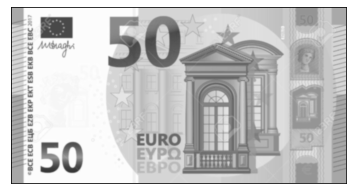

In [25]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread(path,0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

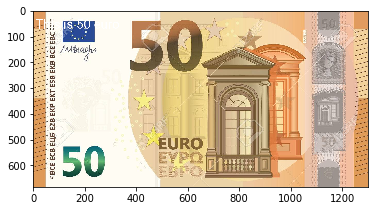

In [75]:
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import cv2

image = cv2.imread(path)

cv2_im_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pil_im = Image.fromarray(cv2_im_rgb)

draw = ImageDraw.Draw(pil_im)

font = ImageFont.truetype("Roboto-Regular.ttf", 50)

draw.text((10, 25), text, font=font)

cv2_im_processed = cv2.cvtColor(np.array(pil_im), cv2.COLOR_RGB2BGR)
cv2.imwrite("result.png", cv2_im_processed)
image1 = cv2.imread("result.png")

cv2_im_rgb1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(cv2_im_rgb1)

In [28]:
import numpy as np
import cv2
font = cv2.FONT_HERSHEY_SIMPLEX
image = cv2.imread(path)

cv2_im_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

cv2.putText(cv2_im_rgb,'Hack Projects',(10,500), font, 1,(0,0,0),2)
#Display the image
cv2.imshow("img",cv2_im_rgb)
# cv2.destroyAllWindows()
# cv2.waitKey(0)